In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
train = pd.read_csv('train.csv')

In [3]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
cols = ['MSZoning', 'LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'YearBuilt',\
        'RoofStyle', 'Exterior1st', 'ExterCond', 'CentralAir',  'HalfBath']

In [5]:
train[cols].head()

,MSZoning,LotFrontage,LotArea,Alley,OverallQual,YearBuilt,RoofStyle,Exterior1st,ExterCond,CentralAir,HalfBath
0,RL,65.0,8450,NaN,7,2003,Gable,VinylSd,TA,Y,1
1,RL,80.0,9600,NaN,6,1976,Gable,MetalSd,TA,Y,0
2,RL,68.0,11250,NaN,7,2001,Gable,VinylSd,TA,Y,1
3,RL,60.0,9550,NaN,7,1915,Gable,Wd Sdng,TA,Y,0
4,RL,84.0,14260,NaN,8,2000,Gable,VinylSd,TA,Y,1


In [6]:
train[cols].shape

(1460, 11)

In [7]:
train[cols].describe()

,LotFrontage,LotArea,OverallQual,YearBuilt,HalfBath
count,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,70.049958,10516.828082,6.099315,1971.267808,0.382877
std,24.284752,9981.264932,1.382997,30.202904,0.502885
min,21.000000,1300.000000,1.000000,1872.000000,0.000000
25%,59.000000,7553.500000,5.000000,1954.000000,0.000000
50%,69.000000,9478.500000,6.000000,1973.000000,0.000000
75%,80.000000,11601.500000,7.000000,2000.000000,1.000000
max,313.000000,215245.000000,10.000000,2010.000000,2.000000


In [8]:
for col in cols:
    print(train[col].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
65.0      44
85.0      40
78.0      25
21.0      23
90.0      23
68.0      19
24.0      19
64.0      19
73.0      18
72.0      17
79.0      17
63.0      17
55.0      17
100.0     16
51.0      15
66.0      15
74.0      15
52.0      14
59.0      13
71.0      12
82.0      12
40.0      12
43.0      12
67.0      12
57.0      12
        ... 
129.0      2
124.0      2
118.0      2
101.0      2
122.0      2
121.0      2
115.0      2
109.0      2
116.0      2
114.0      2
150.0      1
111.0      1
153.0      1
182.0      1
46.0       1
112.0      1
149.0      1
141.0      1
33.0       1
152.0      1
160.0      1
168.0      1
128.0      1
144.0      1
39.0       1
106.0      1
38.0       1
138.0      1
140.0      1
137.0      1
Name: LotFrontage, Length: 110, dtype: int64
7200     25
9600     24
6000     17
10800    14
9000 

## Notes
- MSZoning: Categorical
- LotFrontage: Numerical Continuous
- LotArea: Numerical Continuous
- Alley: Categorical
- OverallQual: Ordinal
- YearBuilt: Numerical Discrete
- RoofStyle: Categorical
- Exterioirlst: Categorical
- ExterCond: Categorical
- CentralAir: Categorical
- HalfBath: Oridinal

In [9]:
for col in cols:
    print('{}: {}%'.format(col, train[col].isnull().sum()*100/train[col].shape[0]))

MSZoning: 0.0%
LotFrontage: 17.73972602739726%
LotArea: 0.0%
Alley: 93.76712328767124%
OverallQual: 0.0%
YearBuilt: 0.0%
RoofStyle: 0.0%
Exterior1st: 0.0%
ExterCond: 0.0%
CentralAir: 0.0%
HalfBath: 0.0%


## MSZoning: Identifies the general zoning classification of the sale.
		
- A  : Agriculture
- C  : Commercial
- FV : Floating Village Residential
- I	 : Industrial
- RH : Residential High Density
- RL : Residential Low Density
- RP : Residential Low Density Park 
- RM : Residential Medium Density

In [10]:
mszoning = train[train['MSZoning'].isnull() == False]['MSZoning']

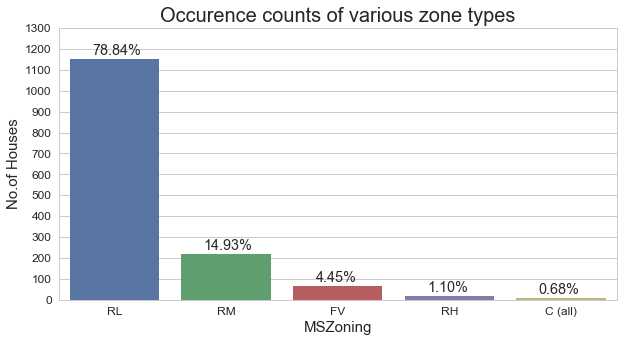

In [11]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.countplot(x=mszoning, orient="v", order=['RL', 'RM', 'FV', 'RH', 'C (all)'])
    ax.set_title('Occurence counts of various zone types', size=20)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('MSZoning', size=15)
    ps = ((mszoning.value_counts() / mszoning.shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.20, p.get_height()+20))
    ax.set_yticks(np.arange(0, 1400, 100))
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- 77.7% of all the properties that have been considered for selling are residential areas with low population density.
- 15.78% of all the properties that have been considered for selling are residential areas with medium population density.
- We can infer from the above data that there is a high demand of residential area which have medium to low densities

## LotFrontage: Linear feet of street connected to property

In [12]:
lotfrontage = train[train['LotFrontage'].isnull() == False]['LotFrontage']

In [13]:
lotfrontage.describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

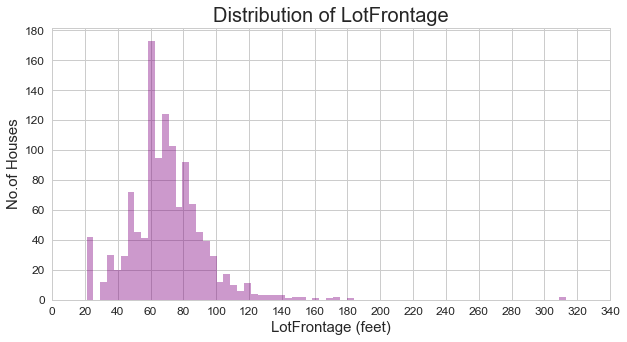

In [14]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=lotfrontage, kde=False, color='purple', bins=70)
    ax.set_title('Distribution of LotFrontage', size=20)
    ax.set_yticks(np.arange(0, 200, 20))
    ax.set_xticks(np.arange(0, 350, 20))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('LotFrontage (feet)', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

In [15]:
np.sort(lotfrontage.values)[-20:]

array([ 130.,  130.,  134.,  134.,  137.,  138.,  140.,  141.,  144.,
        149.,  150.,  152.,  153.,  160.,  168.,  174.,  174.,  182.,
        313.,  313.])

### Remarks:
- Most of the properties have street of lenght 60 to 80 feet connected to it.
- It is highly likely there are two outliers which have a 313 feet of street connected to the property. 

## LotArea: Lot size in square feet

In [16]:
lotarea = train[train['LotArea'].isnull() == False]['LotArea']

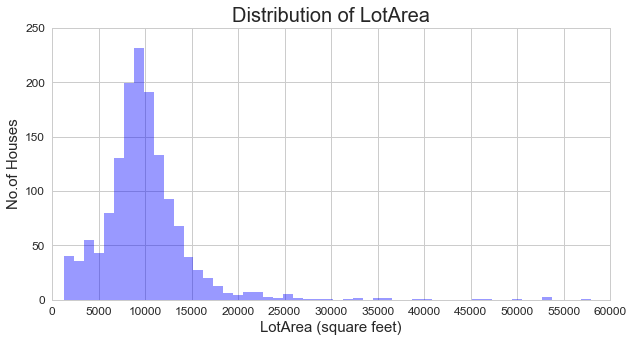

In [17]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=lotarea, kde=False, color='blue', bins=200)
    ax.set_title('Distribution of LotArea', size=20)
    ax.set_xticks(np.arange(0, 250000, 5000))
    ax.set_xlim(0, 60000)
    ax.set_yticks(np.arange(0, 500, 50))
    ax.set_ylim(0, 250)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('LotArea (square feet)', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- Most of the properties sold have a lot area of 5000 to 1000 square feet.
- We could conclude that large properties are sold rarely.

## Alley: Type of alley access to property
- Grvl:	Gravel
- Pave: Paved
- NA: 	No alley access

In [18]:
alley = train['Alley']
alley = alley.fillna('No Alley Access')
alley = alley.replace('Grvl', 'Gravel')
alley = alley.replace('Pave', 'Paved')

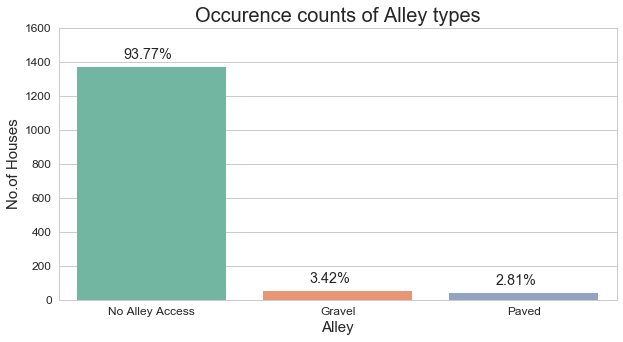

In [19]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.countplot(x=alley, order=['No Alley Access', 'Gravel', 'Paved'], palette='Set2')
    ax.set_title('Occurence counts of Alley types', size=20)
    ax.set_yticks(np.arange(0, 1700, 200))
    ax.set_ylim(0, 1600)
    ps = ((alley.value_counts() / alley.shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.25, p.get_height() + 50))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('Alley', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- Most of the properties that have been sold do not have an alley access.
- This could mean having an alley access could either be undesirable in general.

## OverallQual: Rates the overall material and finish of the house
- 10:	Very Excellent
- 9:	Excellent
- 8:	Very Good
- 7:	Good
- 6:	Above Average
- 5:	Average
- 4:	Below Average
- 3:	Fair
- 2:	Poor
- 1:	Very Poor


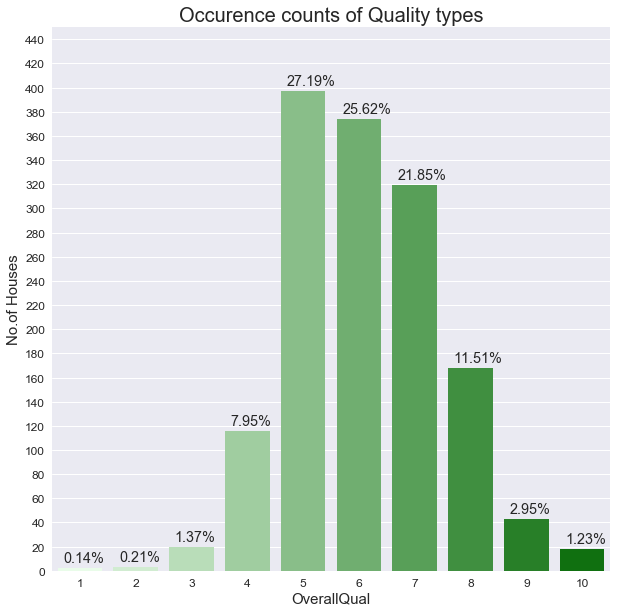

In [20]:
sns.set(font_scale=1.2)
with sns.axes_style("darkgrid"):
    fig = plt.figure()
    ax = sns.countplot(x="OverallQual", data=train, palette=sns.light_palette("green", 10))
    ax.set_title('Occurence counts of Quality types', size=20)
    ax.set_yticks(np.arange(0, 500, 20))
    ax.set_ylim(0, 450)
    ps = ((train['OverallQual'].value_counts()[list(range(1, 11))] / train['OverallQual'].shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.1, p.get_height() + 5))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('OverallQual', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 10)

### Remarks:
- The graph shows an expected behaviour; while a poor quality properly rarely gets sold, an average quality one would be sold the most. Properties with excellent quality would come with a high price tag and would also be sold lot less compared to an average property.


## YearBuilt: Original construction date


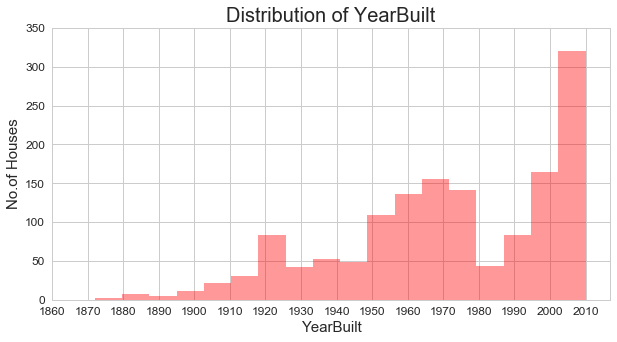

In [21]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ax = sns.distplot(a=train["YearBuilt"], kde=False, color='red')
    ax.set_title('Distribution of YearBuilt', size=20)
    ax.set_yticks(np.arange(0, 400, 50))
    ax.set_xticks(np.arange(1860, 2017, 10))
    ax.set_ylim(0, 350)
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('YearBuilt', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- Houses that have been built in recent times are more likely to be sold.
- The trend does not apply to the houses built around 1980 till 1995, the reasons for which needs further investigating.

## RoofStyle: Type of roof
- Flat
- Gable	
- Hip	
- Mansard	
- Shed	


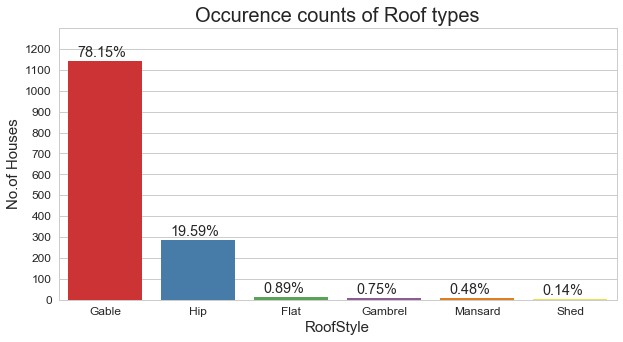

In [22]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    order=['Gable', 'Hip', 'Flat', 'Gambrel', 'Mansard', 'Shed']
    ax = sns.countplot(x="RoofStyle", data=train, order=order, palette='Set1')
    ax.set_title('Occurence counts of Roof types', size=20)
    ax.set_yticks(np.arange(0, 1300, 100))
    ax.set_ylim(0, 1300)
    ps = ((train['RoofStyle'].value_counts() / train['RoofStyle'].shape[0]) * 100).values
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.1, p.get_height() + 20))
    ax.set_ylabel('No.of Houses', size=15)
    ax.set_xlabel('RoofStyle', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- Most of the houses sold have Gable roofs, or Gable is are the most common type of roof, followed by Hip roofs (by a large margin)

## Exterior1st: Exterior covering on house
- AsbShng:	Asbestos Shingles
- AsphShn:	Asphalt Shingles
- BrkComm:	Brick Common
- BrkFace:	Brick Face
- CBlock:	Cinder Block
- CemntBd:	Cement Board
- HdBoard:	Hard Board
- ImStucc:	Imitation Stucco
- MetalSd:	Metal Siding
- Other:	Other
- Plywood:	Plywood
- PreCast:	PreCast	
- Stone:	Stone
- Stucco:	Stucco
- VinylSd:	Vinyl Siding
- Wd Sdng:	Wood Siding
- WdShing:	Wood Shingles

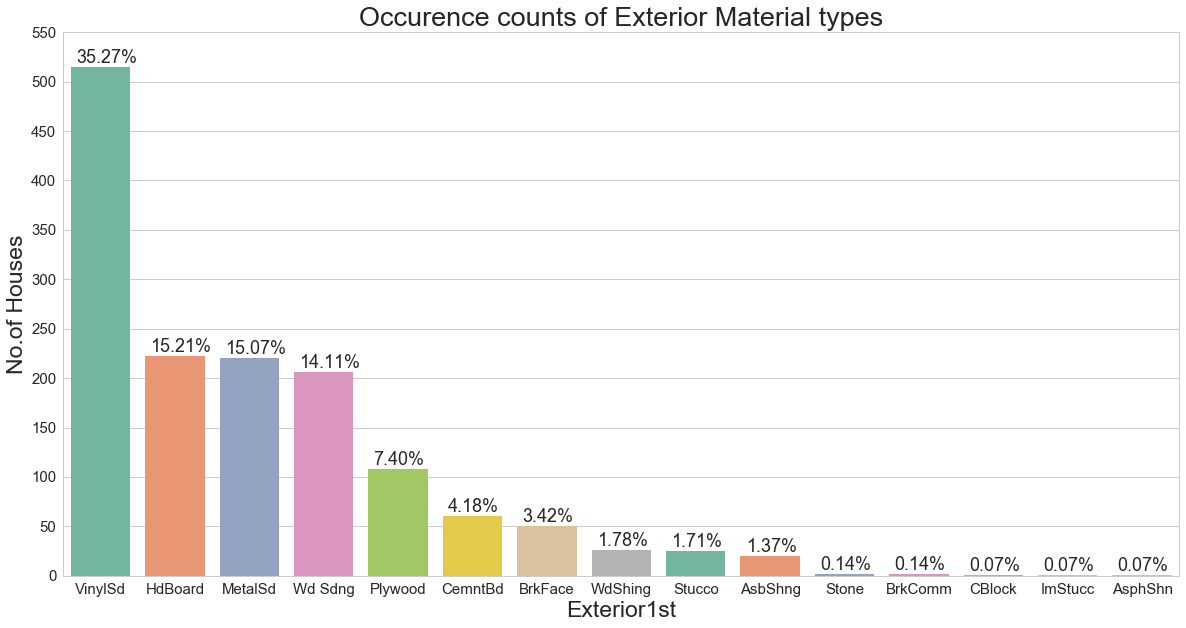

In [23]:
sns.set(font_scale=1.5)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = ((train['Exterior1st'].value_counts() / train['Exterior1st'].shape[0]) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="Exterior1st", order=order, data=train, palette='Set2')
    ax.set_title('Occurence counts of Exterior Material types', size=27)
    ax.set_yticks(np.arange(0, 600, 50))
    ax.set_ylim(0, 550)
    ax.set_xlabel(xlabel="Exterior1st", size=23)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.07, p.get_height() + 4))
    ax.set_ylabel('No.of Houses', size=23)
    fig.add_subplot(ax)
    fig.set_size_inches(20, 10)

### Remarks:
- While Vinyl Siding remains the popular choice for external covering of the house, hard boards, metal siding and wooden sidings are the next best choices.

## ExterCond: Evaluates the present condition of the material on the exterior
- Ex: Excellent
- Gd: Good
- TA: Average/Typical
- Fa: Fair
- Po: Poor

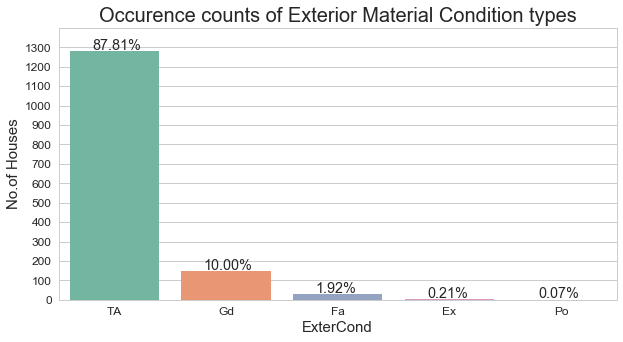

In [44]:
sns.set(font_scale=1.2)
with sns.axes_style("whitegrid"):
    fig = plt.figure()
    ps = ((train['ExterCond'].value_counts() / train['ExterCond'].shape[0]) * 100)
    vals = np.sort(ps.values)[::-1]
    order = ps.index.values[np.argsort(ps.values)[::-1]].tolist()
    ax = sns.countplot(x="ExterCond", order=order, data=train, palette='Set2')
    ax.set_title('Occurence counts of Exterior Material Condition types', size=20)
    ax.set_yticks(np.arange(0, 1400, 100))
    ax.set_ylim(0, 1400)
    ax.set_xlabel(xlabel="ExterCond", size=15)
    for i, p in enumerate(ax.patches):
        ax.annotate('{0:.2f}%'.format(ps[i]), (p.get_x() + 0.2, p.get_height() + 7))
    ax.set_ylabel('No.of Houses', size=15)
    fig.add_subplot(ax)
    fig.set_size_inches(10, 5)

### Remarks:
- Almost 88% of the houses that have been sold had an average quality of exterior materials and only a handful of houses had excellent or poor quality materials for their exteriors.